In [12]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 15]
from scipy.optimize import curve_fit

In [13]:
def data_scanner(er):
    E = []
    P = []
    T = []
    avalanching = False
    time_holder = 0
    energy_holder = 0
    peak_holder = 0
    for i in range(len(er)):
        if er[i] and not avalanching:
            avalanching = True
            time_holder = i
            energy_holder += er[i]
            peak_holder = er[i]
        if er[i] and avalanching:
            energy_holder += er[i]
            if er[i] > peak_holder:
                peak_holder = er[i]
        if not er[i] and avalanching:
            avalanching = False
            T.append(i - time_holder)
            P.append(peak_holder)
            peak_holder = 0
            E.append(energy_holder)
            energy_holder = 0
    return E, P, T

def line(x, a, b):
    return -a * x + b

def hist_(array):
    space = np.logspace(np.log10(min(array)), np.log10(max(array)), 100, base=10)
    hist = np.histogram(array, bins=space[10:-15], density=True)
    for i in range(len(hist[0])):  # transforms 0 into small values for no errors
        if hist[0][i] < 1e-15:
            hist[0][i] = 1e-15
    x = (hist[1][:-1] + hist[1][1:]) / 2  # Average the bins sides for the fitting
    refined_x = x[hist[0] > 1e-10]
    refined_hist = hist[0][hist[0] > 1e-10]
    popt, pcov = curve_fit(line, np.log10(refined_x[np.log10(refined_x)>0.5]),
                           np.log10(refined_hist[np.log10(refined_x)>0.5]))  # fitting of the line
    return [hist, x, popt]

In [14]:
data = np.load('../N32_D01_data.npz')
er = data['er']
ec = data['ec']
el = data['el']
array = np.load('../Saves/N32_D01.npz')['lat_B']
curv = np.zeros((32,32))  # curvature of the lattice initialization
curv[1:-1, 1:-1] = array[1:-1, 1:-1] - 1 / 4 * (array[1:-1, 0:-2] + array[1:-1, 2:] +
                                                     array[0:-2, 1:-1] + array[2:, 1:-1])

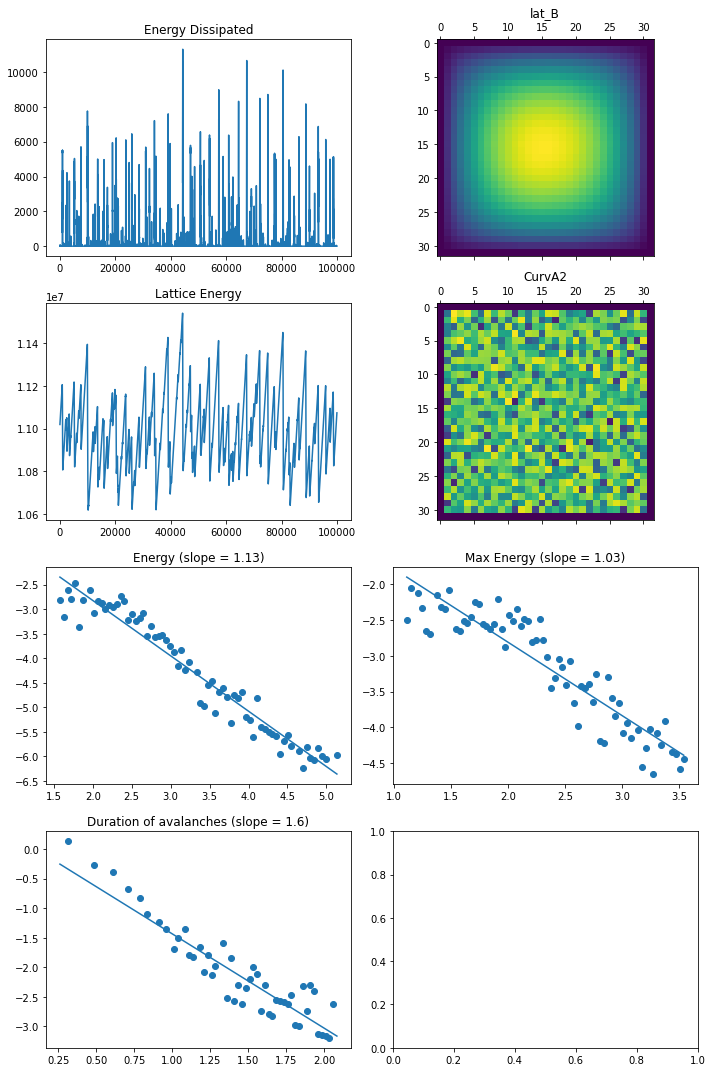

In [15]:
E, P, T = data_scanner(er)
E_ = hist_(E)
P_ = hist_(P)
T_ = hist_(T)

fig, ax = plt.subplots(4,2)
ax[0,1].matshow(array)
ax[0,1].set_title('lat_B')
ax[1,1].matshow(curv)
ax[1,1].set_title('CurvA2')
ax[0,0].plot(er)
ax[0,0].set_title('Energy Dissipated')
ax[1,0].plot(el)
ax[1,0].set_title('Lattice Energy')

ax[2,0].scatter(np.log10(E_[1][E_[0][0] > 1e-10]), np.log10(E_[0][0][E_[0][0] > 1e-10]))
ax[2,0].plot(np.log10(E_[1]), line(np.log10(E_[1]), E_[2][0], E_[2][1]))
ax[2,0].set_title('Energy (slope = {})'.format(round(E_[2][0], 2)))

ax[2, 1].scatter(np.log10(P_[1][P_[0][0] > 1e-10]), np.log10(P_[0][0][P_[0][0] > 1e-10]))
ax[2, 1].plot(np.log10(P_[1]), line(np.log10(P_[1]), P_[2][0], P_[2][1]))
ax[2, 1].set_title('Max Energy (slope = {})'.format(round(P_[2][0], 2)))

ax[3, 0].scatter(np.log10(T_[1][T_[0][0] > 1e-10]), np.log10(T_[0][0][T_[0][0] > 1e-10]))
ax[3, 0].plot(np.log10(T_[1]), line(np.log10(T_[1]), T_[2][0], T_[2][1]))
ax[3, 0].set_title('Duration of avalanches (slope = {})'.format(round(T_[2][0], 2)))

plt.tight_layout()
plt.show()

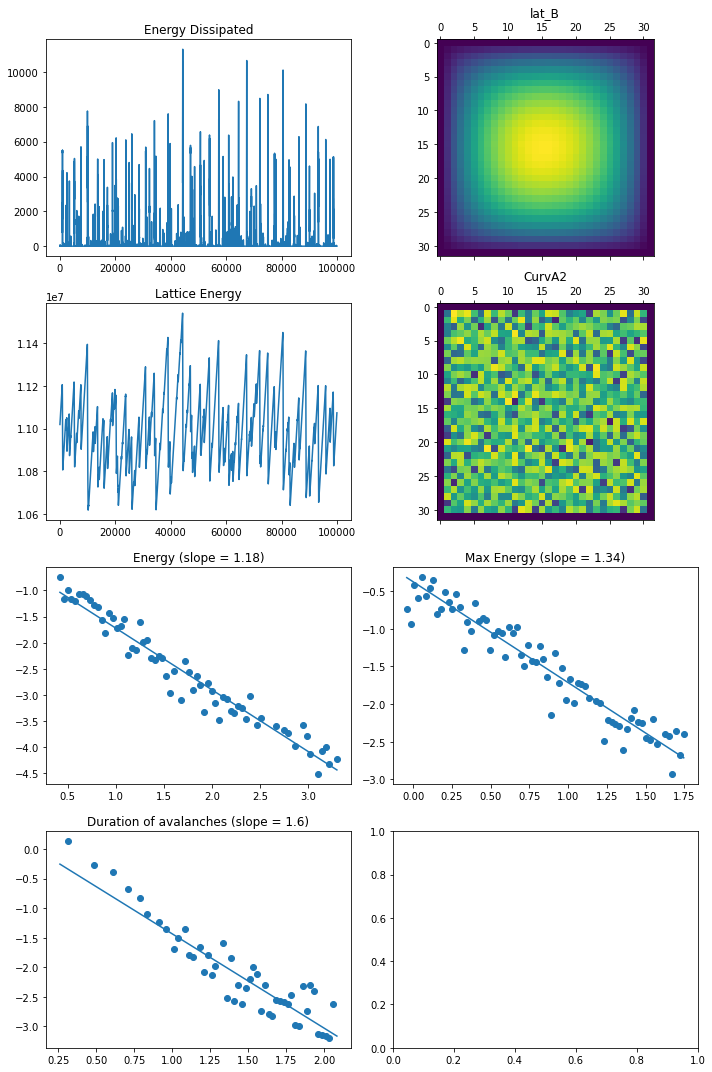

In [16]:
E, P, T = data_scanner(ec)
E_ = hist_(E)
P_ = hist_(P)
T_ = hist_(T)

fig, ax = plt.subplots(4,2)
ax[0,1].matshow(array)
ax[0,1].set_title('lat_B')
ax[1,1].matshow(curv)
ax[1,1].set_title('CurvA2')
ax[0,0].plot(er)
ax[0,0].set_title('Energy Dissipated')
ax[1,0].plot(el)
ax[1,0].set_title('Lattice Energy')

ax[2,0].scatter(np.log10(E_[1][E_[0][0] > 1e-10]), np.log10(E_[0][0][E_[0][0] > 1e-10]))
ax[2,0].plot(np.log10(E_[1]), line(np.log10(E_[1]), E_[2][0], E_[2][1]))
ax[2,0].set_title('Energy (slope = {})'.format(round(E_[2][0], 2)))

ax[2, 1].scatter(np.log10(P_[1][P_[0][0] > 1e-10]), np.log10(P_[0][0][P_[0][0] > 1e-10]))
ax[2, 1].plot(np.log10(P_[1]), line(np.log10(P_[1]), P_[2][0], P_[2][1]))
ax[2, 1].set_title('Max Energy (slope = {})'.format(round(P_[2][0], 2)))

ax[3, 0].scatter(np.log10(T_[1][T_[0][0] > 1e-10]), np.log10(T_[0][0][T_[0][0] > 1e-10]))
ax[3, 0].plot(np.log10(T_[1]), line(np.log10(T_[1]), T_[2][0], T_[2][1]))
ax[3, 0].set_title('Duration of avalanches (slope = {})'.format(round(T_[2][0], 2)))

plt.tight_layout()
plt.show()